# DNBLab Jupyter Notebook Tutorial
## Datenanalyse, -bereinigung und Ergebnisvisualisierung
In diesem Tutorial wird das Publikationsdatum aus einem kleinen Metadatenset im MARC21-Format extrahiert und aus den Daten ein Balkendiagramm erstellt, um die Verteilung der Publikationen nach Erscheinungsjahren sichtbar zu machen.

### Einrichten der Arbeitsumgebung
Die benötigten Python-Bibliotheken und Module werden importiert. Zum Parsen und Verarbeiten der XML- Daten werden BeautifulSoup und lxml verwendet. Pandas ist eine Bibliothek zur Analyse, Verarbeitung und Darstellung von Daten.

In [1]:
from bs4 import BeautifulSoup as soup #Laden der Python-Bibliotheken und Module.
from lxml import etree as ET
import pandas as pd
import re

  * [Herangehensweise Datenbereinigung](#Herangehensweise-der-Datenbereinigung) 
  * [Fertige Funktion](#Die-fertige-Funktion)
  * [Erstellen der Visualisierung](#Erstellen-der-Visualisierung)

Im nächsten Schritt werden Daten aus dem bereitgestellten Tutorial-Datenset entnommen und zur Verarbeitung in das Jupyter-Notebook geladen. Diese Daten werden im Anschluss für die weitere Bearbeitung in der Variablen 'records' gespeichert.

In [2]:
# Laden der Daten und Zählen der im Datenset enthaltenen Records: 

xml = open("dataset_tutorial_eco.xml", "r", encoding="utf-8")
data = soup(xml, "xml")                    

records = data.find_all("record", {'type':'Bibliographic'})  #Die Daten werden nach einem bestimmten Keyword 'record' und dem Typ 'Bibliographic' durchsucht und nur diese werden in der Variablen gespeichert.
print("Gefundene Records:", len(records)) #Die Anzahl der Einträge wird ausgegeben.

Gefundene Records: 2828


##### Beispielhafte Anzeige des ersten (0.) Treffers. 
Im Folgenden ist die Ausgabe der Variablen 'records' zu sehen. Diese Anzeige kann später genutzt werden, um sich den Code anderer Treffer näher anzuschauen, wenn die Daten nicht wie erwartet gefunden wurden: 

In [3]:
print(records[2].prettify()) #Funktion zur Umwandlung der Daten in der Variablen in einen Unicode string, um sie besser lesbar zu machen.

<record type="Bibliographic">
 <leader>
  00000nam a2200000 c 4500
 </leader>
 <controlfield tag="001">
  1012057232
 </controlfield>
 <controlfield tag="003">
  DE-101
 </controlfield>
 <controlfield tag="005">
  20171202201255.0
 </controlfield>
 <controlfield tag="007">
  cr||||||||||||
 </controlfield>
 <controlfield tag="008">
  110524s2010    gw |||||om||| 00||||eng
 </controlfield>
 <datafield ind1=" " ind2=" " tag="015">
  <subfield code="a">
   11,O06
  </subfield>
  <subfield code="2">
   dnb
  </subfield>
 </datafield>
 <datafield ind1="7" ind2=" " tag="016">
  <subfield code="2">
   DE-101
  </subfield>
  <subfield code="a">
   1012057232
  </subfield>
 </datafield>
 <datafield ind1="7" ind2=" " tag="024">
  <subfield code="2">
   urn
  </subfield>
  <subfield code="a">
   urn:nbn:de:kobv:83-opus-28982
  </subfield>
 </datafield>
 <datafield ind1=" " ind2=" " tag="035">
  <subfield code="a">
   (DE-599)DNB1012057232
  </subfield>
 </datafield>
 <datafield ind1=" " ind2=" " 

## Herangehensweise der Datenbereinigung

 Für die Analyse des Publikationsdatums muss diese Information im Vorhinein aus den Daten extrahiert werden. Dafür werden alle Einträge einzeln durchsucht und
 das Publikationsdatum aus Datafield 264 $c gezogen (Feldverzeichnis: https://www.dnb.de/marc21): 

In [4]:
#In der if-Schleife wird das Publikationsdatum ausgegeben. Falls in dem Feld 264 $c kein Datum gefunden wurde, wird ("N/A") ausgegeben: 

for record in records: 
    xml = ET.fromstring(str(record))
    date1 = xml.xpath(".//datafield[@tag = '264']/subfield[@code = 'c']")
    if date1:
        print(date1[0].text)
    else:
        print("N/A")

2010
2010
N/A
N/A
2010
N/A
N/A
2010
2010
N/A
N/A
N/A
2010
2010
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
2010
2010
N/A
2010
2010
N/A
N/A
N/A
N/A
2010
N/A
2010
2010
2010
N/A
2010
N/A
N/A
N/A
2010
2010
N/A
N/A
N/A
N/A
2010
2010
N/A
N/A
N/A
N/A
2010
N/A
N/A
2010
N/A
N/A
N/A
N/A
2010
N/A
N/A
2010
N/A
N/A
2010
2010
2010
N/A
2010
2010
N/A
2010
N/A
N/A
N/A
2010
N/A
N/A
2010
2010
2010
N/A
2010
2010
N/A
N/A
2010
2010
2010
N/A
2010
2010
N/A
N/A
N/A
N/A
2010
N/A
N/A
2010
2010
N/A
N/A
N/A
2010
N/A
N/A
2010
2010
N/A
N/A
N/A
2010
N/A
N/A
N/A
N/A
2010
N/A
N/A
N/A
N/A
2010
N/A
2010
N/A
2010
N/A
N/A
2010
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
2010
2010
2010
N/A
2010
2010
N/A
2010
N/A
2010
2010
N/A
N/A
2010
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
2010
2010
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
2010
N/A
2010
N/A
N/A
N/A
N/A
2010
2010
2010
N/A
N/A
N/A
N/A
N/A
N/A
N/A
2010
2010
N/A
2010
N/A
N/A
2010
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
2010
N/A
N/A
2010
N/A
N/A
2010
2010
2010
2010
2010
2010
2010
N/A
20

Es fällt auf, dass bereits beim dritten Record kein Datum gefunden wurde. 
Warum ist das so? Hierzu kann noch einmal Treffer Nr. 3 (also [2]) angezeigt werden: [Sprung zur beispielhaften Anzeige](#Beispielhafte-Anzeige-des-ersten-(0.)-Treffers.) 


Beim Nachschauen fällt auf, dass tatsächlich kein Datafield 264 c existiert, dafür aber ein Publikationsdatum im Hochschulschriftenvermerk (Datafield 502 a) zu finden ist. Daher wird der Code so angepasst, dass erst nachgeschaut wird, ob es ein entsprechendes 264-Feld gibt. Falls dies nicht exisitert, wird nach 502-Feld geschaut. Erst wenn beide Felder nicht vorhanden sind, wird ein "N/A"-Eintrag vorgenommen: 


In [5]:
# Die Datafields 264 und 502 der XML-Datei werden durchsucht und jeweils in die Variablen 'date1' und 'date2' gespeichert:

for record in records: #Es wird mit einer if-Funktion geprüft, ob ein Datum in Feld 264 oder 502 exisitiert. 
    xml = ET.fromstring(str(record))
    date1 = xml.xpath(".//datafield[@tag = '264']/subfield[@code = 'c']")
    date2 = xml.xpath(".//datafield[@tag = '502']/subfield[@code = 'a']")
    if date1:
        print(date1[0].text)
    elif date2: 
        print(date2[0].text)
    else: #Falls dies nicht der Fall ist, wird "N/A" ausgegeben.
        print("N/A")

2010
2010
Berlin, Techn. Univ., Diss., 2010
München, Univ., Diss., 2010
2010
Ulm, Univ., Diss., 2010
Passau, Univ., Diss., 2010
2010
2010
Bonn, Univ., Diss., 2009
Karlsruher Inst. für Technologie, Diss., 2010
Berlin, Techn. Univ., Diss., 2010
2010
2010
Karlsruher Inst. für Technologie, Diss., 2010
Bonn, Univ., Diss., 2009
Berlin, Techn. Univ., Diss., 2010
Göttingen, Univ., Diss., 2002
München, Univ., Diss., 2010
Augsburg, Univ., Diss., 2010
München, Univ., Diss., 2010
Berlin, Techn. Univ., Diss., 2010
2010
2010
Freiburg (Breisgau), Univ., Diss., 2010
2010
2010
Kiel, Univ., Diss., 2010
Tübingen, Univ., Diss., 2009
Siegen, Univ., Diss., 2010
Mannheim, Univ., Diss., 2010
2010
Kiel, Univ., Diss., 2010
2010
2010
2010
Erlangen, Nürnberg, Diss., 2010
2010
Bonn, Univ., Diss., 2010
Karlsruher Inst. für Technologie, Diss., 2010
Mannheim, Univ., Diss., 2009
2010
2010
Bamberg, Univ., Diss., 2009
Würzburg, Univ., Diss., 2010
Augsburg, Univ., Diss., 2010
Bremen, Univ., Diss., 2010
2010
201

Nun gibt es zwar umfassend Einträge, allerdings teilweise mit viel Text. Interessant ist aber nur die Jahreszahl. Daher wird der Code noch einmal angepasst. Da in allen Feldern mit Hochschulschriftenvermerk die Jahreszahl der Publikation am Ende des Feldes steht, werden nur die jeweils letzten 4 Zeichen des Hochschulschriftenvermerks genommen. Der restliche Inhalt wird abgeschnitten.

In [6]:
# Der Code wird aus der vorherigen Zelle übernommen. Es wird nur bei 'date 2' mithilfe des negativen Index die Zeichenbegrenzung hinzugefügt:

for record in records: 
    xml = ET.fromstring(str(record))
    date1 = xml.xpath(".//datafield[@tag = '264']/subfield[@code = 'c']")
    date2 = xml.xpath(".//datafield[@tag = '502']/subfield[@code = 'a']")
    if date1:
        print(date1[0].text)
    elif date2: 
        date2 = date2[0].text
        date2 = date2[-4:]       # Hier wird die Eingrenzung auf die letzten 4 Zeichen des Textes vorgenommen
        print(date2)
    else:
        print("N/A")

2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2010
2010
2010
2010
2009
2010
2002
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2010
2010
2010
2010
2010
2010
2008
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2009
2009
2010
2011
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2007
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2010
2010
2010
2010
2009
2010
2010
2009
2010
2010
2010
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2010
2010
2010
2010
2007
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010


Zur Kontrolle kann noch einmal durch die Ergebnisse gescrollt werden, weil nun optisch alle Einträge deutlich herausstechen, die kürzer oder länger als vier Zahlen sind. 
Da es noch einige wenige Einträge in Feld 264c mit Jahreszahl in eckigen Klammern gibt, werden hier noch alle [] entfernt: 

In [7]:
# Der Code wird aus der vorherigen Zelle übernommen, es werden nur bei 'date 1' mithilfe der .strip()-Funktion die eckigen Klammern entfernt: 

for record in records: 
    xml = ET.fromstring(str(record))
    date1 = xml.xpath(".//datafield[@tag = '264']/subfield[@code = 'c']")
    date2 = xml.xpath(".//datafield[@tag = '502']/subfield[@code = 'a']")
    if date1:
        date1 = date1[0].text
        date1 = date1.strip("[]")   # Entfernen der eckigen Klammern
        print(date1)
    elif date2: 
        date2 = date2[0].text
        date2 = date2[-4:]
        print(date2)
    else:
        print("N/A")

2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2010
2010
2010
2010
2009
2010
2002
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2010
2010
2010
2010
2010
2010
2008
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2009
2010
2009
2009
2010
2011
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2007
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2010
2010
2010
2010
2009
2010
2010
2009
2010
2010
2010
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2010
2010
2010
2010
2007
2010
2010
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010


## Die fertige Funktion

Der Code wird mit allen Schritten der vorangegangenen Datenbereinigung in eine Funktion eingebettet und um weitere Informationen ergänzt. 
In der if-else-Schleife wird jeweils zusätzlich ausgegeben, in welchem Feld die Jahreszahl gefunden wurde. Wird sie direkt am Anfang in Feld 264 gefunden, wird eine weitere Variable "source" gesetzt und dort "264" eingetragen. Existiert dieses Feld nicht, aber ein Eintrag in Feld 502, wird in die Variable "source" der Wert 502 eingetragen. Wird keines der beiden Felder gefunden, wird "N/A" ausgegeben. 
Außerdem wird ein zusätzliches Feld "controlfield" mit der Nummer 001 ausgegeben, welches die Identifikationsnummer (IDN) des jeweiligen Datensatzes enthält. Über die IDN kann der Datensatz bei Fehlern oder anderen Unklarheiten direkt im entsprechenden Katalog-Datensatz angesehen werden:

In [8]:
# Extraktion der IDN, aus der XML-Datei für die spätere Tabelle: 

def get_data(record): 
        
    xml = ET.fromstring(str(record))
    
    date1 = xml.xpath(".//datafield[@tag = '264']/subfield[@code = 'c']")
    date2 = xml.xpath(".//datafield[@tag = '502']/subfield[@code = 'a']")
    if date1:
        date1 = date1[0].text
        date = date1.strip("[]c 'f idnn'")
        source = "264"
    elif date2:
        date2 = date2[0].text
        date = date2[-4:]
        source = "502"
    else:
        date = "N/A"
        source = "N/A"
        
        
    idn = xml.xpath(".//controlfield[@tag = '001']")
    if idn:
        idn = idn[0].text
    
        
    results = {"date":date, "source":source, "idn":idn} #results enthält die Parameter für das DataFrame im nächsten Schritt
    
    return results
    


Mit dem folgenden Code wird jeder Treffer / Record einzeln der Funktion übergeben und nach den entsprechenden Feldern durchsucht, bevor die Ergebnisse dann in eine tabellarische Darstellung übertragen werden: 

In [9]:
data = [get_data(record) for record in records] #Mithilfe der Bibliothek Pandas werden die Daten in ein DataFrame übergeben, das anschließend ausgegeben wird.
df = pd.DataFrame(data)
df

,date,source,idn
0,2010,264,1043718966
1,2010,264,1019902175
2,2010,502,1012057232
3,2010,502,1009567691
4,2010,264,1045290823
...,...,...,...
2823,2000,264,120766099X
2824,2000,502,961697555
2825,2000,264,1035450941
2826,2000,264,1206191139


Hier wird nochmal geprüft, ob sich noch Einträge mit "N/A" in der Tabelle befinden: 

In [10]:
df.loc[df['date'] == "N/A"]

,date,source,idn


Und hiermit kann geschaut werden, ob es noch Einträge gibt, die länger als 4 Zeichen sind: 

In [11]:
df.query("date.str.len() > 4")

,date,source,idn


Die Tabelle kann als Excel-Datei ausgegeben werden: 

In [12]:
df.to_excel("dates.xlsx", encoding="utf-8")

## Erstellen der Visualisierung 

Mithilfe des folgenden Codes wird die Häufigkeit der jeweiligen Jahreszahlen im Datensatz dargestellt. Dabei wird für jeden Eintrag ein "Strich" gezeichnet. Es handelt sich bei der Darstellung also um einen "Stapel" an Einträgen. Dies lässt sich auch optisch an den Streifen der Balken erkennen. Auch zeigt das Mouseover jedesmal als Anzahl/Count "1" an, auch wenn insgesamt fast 500 mal die Jahreszahl 2010 im Datensatz vorkommt: 

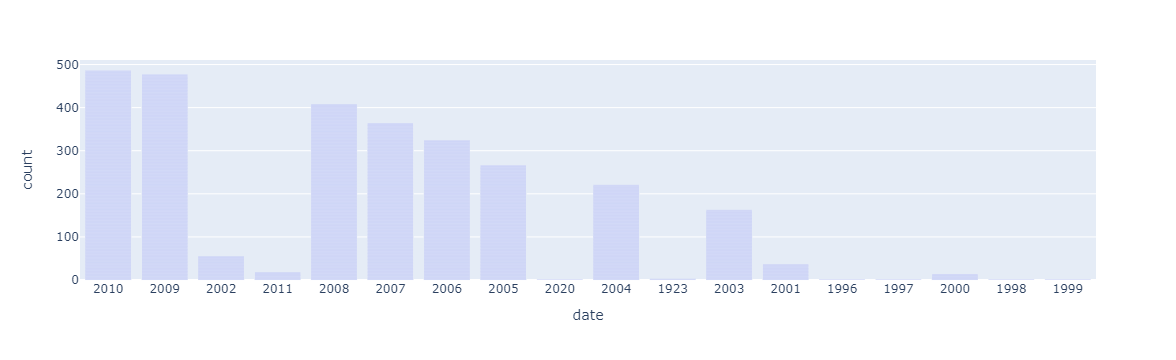

In [14]:
#Mit der Bibliothek plotly können interaktive Graphen geplottet werden:
import plotly.express as px

fig = px.bar(df, x='date') #Mit px.bar() wird jede Zeile des übergebenen DataFrames in Form eines Balken dargestellt. Die Notation wird wie folgt übergeben: dataframe, x-Achse, y-Achse.
fig.show() #Mit der Funktion .show() wird der fertige Graph angezeigt.


Für eine graphisch schönere Ansicht wird die Anzeige in einem Histogramm gebündelt. So werden die Balken zusammengefasst und die Anzahl beim Mouseover passt sich an.

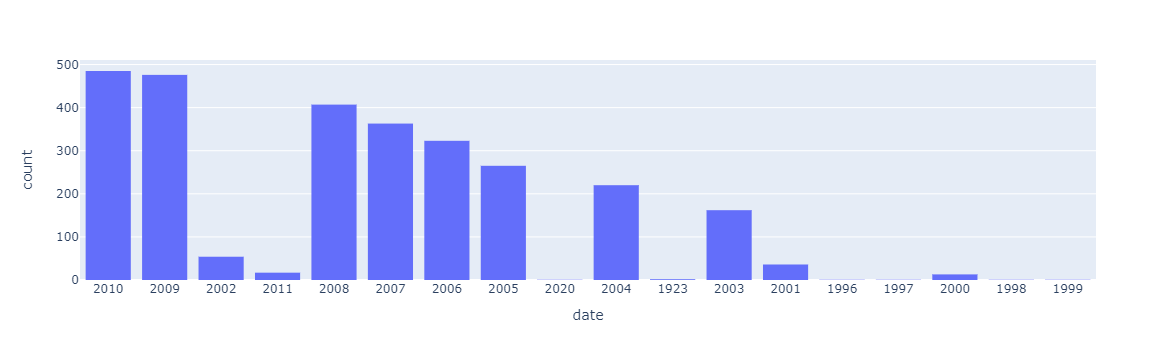

In [15]:
#Um ein Histogramm zu erstellen, wird statt der px.bar()-Funktion die px.histogram()-Funktion verwendet:

fig2 = px.histogram(df, x="date", barmode='group')
fig2.show()

Nun zeigt auch das Mouseover die Gesamtanzahl zur jeweiligen Jahreszahl. 

Die Anzeige kann noch auf- oder absteigend sortiert werden: 

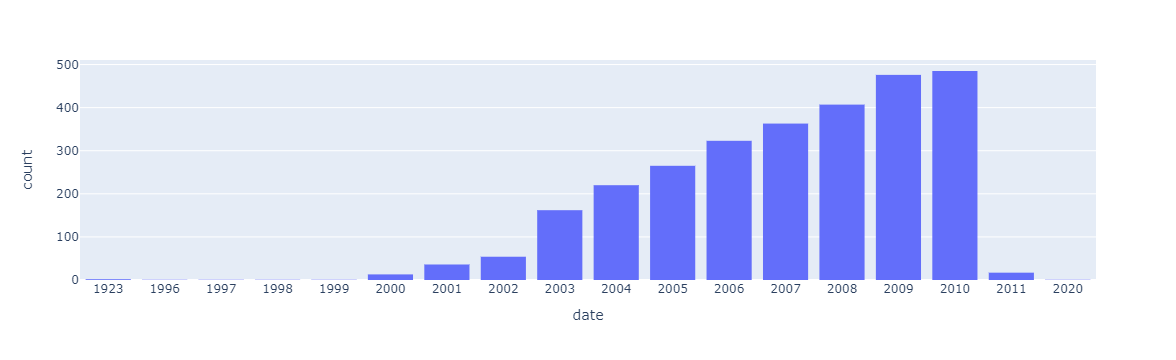

In [16]:
#Die Sortierung der Daten auf der x-Achse wird in der Funktion .update_layout() mit "category ascending" (aufsteigende Sortierung) geändert.

fig2 = px.histogram(df, x="date", barmode='group')
fig2.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig2.show()

Anmerkung: Hier sieht man, dass sich "Ausreißer" bei den Daten durch Visualisierungen gut erkennen lassen. Der Sprung von 1923 auf 1996 fällt auf und lädt ein, die Richtigkeit dieser Angabe zu überprüfen. Mit folgendem Code lässt sich der entsprechende Eintrag auch noch einmal mit Quelle und IDN anzeigen: 

In [17]:
#Im Datenstring wird nach den Informationen der Ausreißer gesucht.

df.query('date.str.contains("1923")')

,date,source,idn
1871,1923,502,978836936
2088,1923,502,979348501


In diesem Fall sind die Angaben korrekt. Es handelt sich um 2 Digitalisate von Dissertationen aus dem Jahr 1923, die 2006 digitalisiert wurden. 

Hinweis: Das verwendete Datenset ist insgesamt nicht repräsentativ, sondern stellt einen Auszug zur Veranschaulichung bestimmter Aspekte der Katalog-Metadaten dar. 